In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [210]:
listing=pd.read_csv('C:/Users/sul/Desktop/Work_Temp/Udacity/Project 1/listings.csv')

In [211]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [15]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Will extract Key columns from the whole Listing dataset

In [212]:
listing=listing[['id','scrape_id', 'last_scraped','host_id','host_response_rate','host_listings_count','zipcode','latitude', 'longitude','property_type', 'room_type','accommodates','bathrooms', 'bedrooms', 'beds','square_feet','price', 'weekly_price', 'monthly_price', 
'availability_30', 'availability_60', 'availability_90','availability_365','number_of_reviews','first_review', 'last_review', 'review_scores_rating','reviews_per_month']]

In [213]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 28 columns):
id                      3818 non-null int64
scrape_id               3818 non-null float64
last_scraped            3818 non-null object
host_id                 3818 non-null int64
host_response_rate      3295 non-null object
host_listings_count     3816 non-null float64
zipcode                 3811 non-null object
latitude                3818 non-null float64
longitude               3818 non-null float64
property_type           3817 non-null object
room_type               3818 non-null object
accommodates            3818 non-null int64
bathrooms               3802 non-null float64
bedrooms                3812 non-null float64
beds                    3817 non-null float64
square_feet             97 non-null float64
price                   3818 non-null object
weekly_price            2009 non-null object
monthly_price           1517 non-null object
availability_30         3818 non-nu

In [214]:
listing.isna().sum()/len(listing)

id                      0.000000
scrape_id               0.000000
last_scraped            0.000000
host_id                 0.000000
host_response_rate      0.136983
host_listings_count     0.000524
zipcode                 0.001833
latitude                0.000000
longitude               0.000000
property_type           0.000262
room_type               0.000000
accommodates            0.000000
bathrooms               0.004191
bedrooms                0.001572
beds                    0.000262
square_feet             0.974594
price                   0.000000
weekly_price            0.473808
monthly_price           0.602672
availability_30         0.000000
availability_60         0.000000
availability_90         0.000000
availability_365        0.000000
number_of_reviews       0.000000
first_review            0.164222
last_review             0.164222
review_scores_rating    0.169460
reviews_per_month       0.164222
dtype: float64

As the missing value rate for square feet is too large, we are going to drop the column.
The weekly and monthly price missing value rate are pretty high, and daily price has no missing value, we are going to drop the weekly and montly price columns, use the daily price column to collect the price information for each listing

In [215]:
listing.drop(['weekly_price','monthly_price','square_feet'],axis=1,inplace=True)

### The question I am interested in is: if I want to invest on AirBnb in Seattle, which region should I pick? I will answer the question from three perspectives: return, number of choices and popularity

Imputing Zipcode using KNN based on latitude and longitude

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [217]:
listing['zipcode'].unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

In [218]:
Listing_Zip1=listing.dropna(subset=['zipcode'],how='any')
Listing_Zip=Listing_Zip1[Listing_Zip1['zipcode']!='99\n98122']
len(Listing_Zip)

3810

In [219]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(Listing_Zip[['latitude','longitude']],Listing_Zip['zipcode'],test_size=0.3,random_state=101)

In [220]:
accuracy=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Train,Y_Train)
    accuracy.append((knn.predict(X_Test)==Y_Test).mean())

Text(0, 0.5, 'Accuracy')

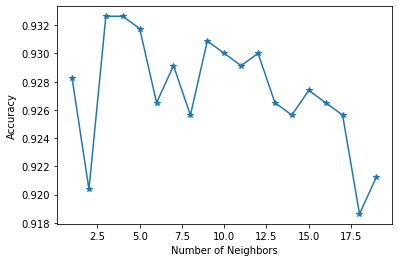

In [221]:
plt.plot(range(1,20),accuracy,marker='*')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

Four Neighbors is the optimum

In [222]:
Listing_ZipMissing=pd.concat([listing[listing['zipcode']=='99\n98122'],listing[listing['zipcode'].isnull()]])

In [223]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_Train,Y_Train)
Listing_ZipMissing['zipcode']=knn.predict(Listing_ZipMissing[['latitude','longitude']])

In [306]:
Listing=pd.concat([Listing_ZipMissing,Listing_Zip])

In [307]:
Listing['zipcode'].unique()

array(['98122', '98107', '98119', '98102', '98109', '98117', '98103',
       '98105', '98115', '98101', '98112', '98144', '98121', '98199',
       '98104', '98134', '98136', '98126', '98146', '98116', '98177',
       '98118', '98108', '98133', '98106', '98178', '98125'], dtype=object)

In [308]:
def extractnum(s):
    s1=s[1:]
    if len(s1.split(","))==1:
        return float(s1)
    else:
        return float(s1.split(",")[0]+s1.split(",")[1])

In [309]:
Listing['price']=Listing['price'].apply(extractnum)

#### Question 1: which region (or zipcode) has the highest price?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

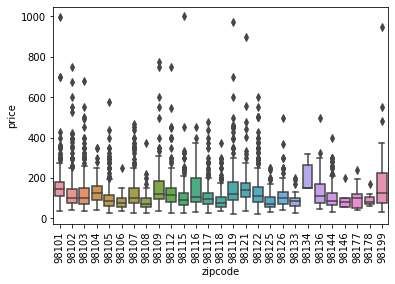

In [156]:
sns.boxplot(x='zipcode',y='price',data=Listing)
plt.xticks(rotation=90)

Daily price for each zip code has some outliers, using median price for each zip code to represent the price level for each region

In [190]:
Price_Rank=Listing.groupby('zipcode').median()['price']
Price_Rank.sort_values(ascending=False)[:11]

zipcode
98134    150.0
98101    147.0
98121    139.0
98199    127.0
98104    125.0
98119    120.0
98109    119.0
98112    115.0
98136    110.0
98122    109.0
98116    105.0
Name: price, dtype: float64

Top 10 Zipcodes with high daily Price are: 98134, 98101, 98121, 98199, 98104, 98119, 98109, 98112, 98136, 98122, 98116

#### Question 2: which region is the most popular one?

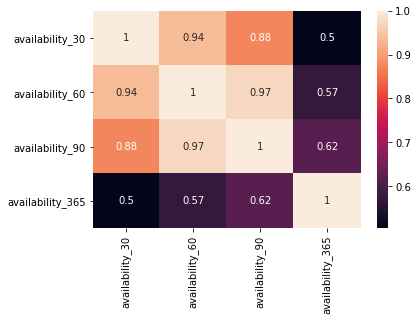

In [195]:
sns.heatmap(Listing[['availability_30','availability_60','availability_90','availability_365']].corr(),annot=True)

From common sense, majority of people will make travelling plans at most three months in advance, therefore room availability in 365 days is not a reliable metric for us to evaluate the popularity of a room. The correlation for room availability in one month, two months and three months are highly correlated, we could just choose one, availability in 60 days to evaluate the popularity for each room

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

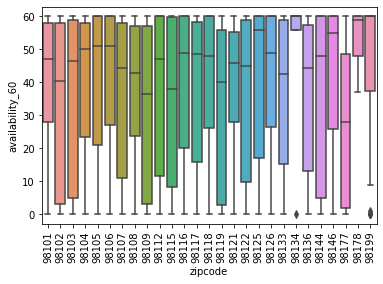

In [200]:
sns.boxplot(data=Listing,x='zipcode',y='availability_60')
plt.xticks(rotation=90)

we also choose to use median of availability in two months as the metric to evaluate the popularity

In [203]:
Listing.groupby('zipcode').median()['availability_60'].sort_values(ascending=True)

zipcode
98177    28.0
98109    36.5
98115    38.0
98119    40.0
98102    40.5
98133    42.5
98108    43.0
98136    44.5
98107    44.5
98122    45.0
98121    46.0
98103    46.5
98101    47.0
98112    47.0
98144    48.0
98118    48.0
98117    48.5
98126    49.0
98116    49.0
98104    50.0
98106    51.0
98105    51.0
98146    55.0
98125    56.0
98178    59.0
98134    60.0
98199    60.0
Name: availability_60, dtype: float64

Top 10 Zipcodes with high demand are: 98177, 98109, 98115, 98119, 98102, 98133, 98108, 98136, 98107, 98122, 98121

#### Question 3: which region has the most properties? So that we will have more options if we plan to do investment

In [205]:
Listing.groupby('zipcode')['id'].nunique().sort_values(ascending=False)

zipcode
98122    424
98103    394
98102    340
98105    225
98109    202
98101    201
98144    200
98121    196
98107    182
98115    178
98112    167
98117    164
98118    154
98119    144
98116    112
98104     95
98125     71
98199     66
98126     63
98106     58
98108     56
98133     46
98136     44
98177     19
98178      7
98134      5
98146      5
Name: id, dtype: int64

Ten zipcodes with the most properties are: 98122, 98103, 98102, 98105, 98109, 98101, 98144, 98121, 98107, 98115, 98112

#### Conclusion: based on the above analysis, the region that is worth investing is the one with zip code 98109, as this region AirBnb is in high demand, and price is pretty high, and there are a lot of properties in this area to choose for investing